# Importação de bibliotecas

In [1]:
import sys
sys.path.insert(0, '../Deps/')

from IO import IO
from glob import glob
from DataAnalysis.Plot import GPIAS as GPIASPlot
from DataAnalysis import DataAnalysis, GPIAS

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
%matplotlib inline

# Definição de variáveis

In [5]:
TimeWindow = [-0.2, 0.2]
FilterFreq = [50]    # frequency for filter
FilterOrder = 3       # butter order
Filter = 'butter'

In [6]:
Ext = ['svg']
Save = True
Show = False

In [7]:
Folder = sorted(glob('../../Data/20??-*'))[0]
InfoFile = sorted(glob('../../Data/*.dict'))[0]
AnalysisFolder = 'ToDelete'
AnalysisKey = 'ToDelete'
FigName = 'ToDelete'

# Realização do experimento

In [8]:
Data, Rate = IO.DataLoader(Folder, AnalogTTLs=True, Unit='mV')
if len(Data.keys()) == 1:
    Proc = list(Data.keys())[0]

DataInfo = IO.Txt.Read(InfoFile)

ExpStim = '_'.join(DataInfo['Animal']['StimType'])

Loading recording1 ...
Loading recording10 ...
Loading recording100 ...
Loading recording101 ...
Loading recording102 ...
Loading recording103 ...
Loading recording104 ...
Loading recording105 ...
Loading recording106 ...
Loading recording107 ...
Loading recording108 ...
Loading recording11 ...
Loading recording12 ...
Loading recording13 ...
Loading recording14 ...
Loading recording15 ...
Loading recording16 ...
Loading recording17 ...
Loading recording18 ...
Loading recording19 ...
Loading recording2 ...
Loading recording20 ...
Loading recording21 ...
Loading recording22 ...
Loading recording23 ...
Loading recording24 ...
Loading recording25 ...
Loading recording26 ...
Loading recording27 ...
Loading recording28 ...
Loading recording29 ...
Loading recording3 ...
Loading recording30 ...
Loading recording31 ...
Loading recording32 ...
Loading recording33 ...
Loading recording34 ...
Loading recording35 ...
Loading recording36 ...
Loading recording37 ...
Loading recording38 ...
Loading re

In [9]:
GPIASRec, XValues = GPIAS.Analysis(
    Data[Proc], DataInfo, Rate[Proc], AnalysisFolder,
    AnalysisKey, TimeWindow,
    FilterFreq, FilterOrder, 'lowpass', Filter, SliceSize=100, Return=True, Save=Save, Overwrite=True)

Slicing and filtering Rec  0 ...
Get TTL timestamps... TTL threshold: 43.513561487197876
Done.
More than one TTL detected!!
[73689]
Slicing and filtering Rec  9 ...
Get TTL timestamps... TTL threshold: 45.99627923965454
Done.
More than one TTL detected!!
[73783]
Slicing and filtering Rec  99 ...
Get TTL timestamps... TTL threshold: 40.92101967334747
Done.
More than one TTL detected!!
[73733]
Slicing and filtering Rec  100 ...
Get TTL timestamps... TTL threshold: 40.939572930336
Done.
More than one TTL detected!!
[73852]
Slicing and filtering Rec  101 ...
Get TTL timestamps... TTL threshold: 40.9937926530838
Done.
More than one TTL detected!!
[73765]
Slicing and filtering Rec  102 ...
Get TTL timestamps... TTL threshold: 44.22852540016174
Done.
More than one TTL detected!!
[73694]
Slicing and filtering Rec  103 ...
Get TTL timestamps... TTL threshold: 44.24258327484131
Done.
More than one TTL detected!!
[73699]
Slicing and filtering Rec  104 ...
Get TTL timestamps... TTL threshold: 41.7

/home/inacio-medeiros/.cache/pypoetry/virtualenvs/sciscripts-ha5_iJk5-py3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/inacio-medeiros/.cache/pypoetry/virtualenvs/sciscripts-ha5_iJk5-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Produção da tabela de resultados

In [10]:
def f(freq, mode):
    V = GPIASRec['Trace'][freq][mode].ravel()[6000:7501]
    return pd.Series({'Latência': XValues[6000+np.where(V == V.max())[0][0]], 'Amplitude': V.max()})

In [11]:
df = pd.DataFrame(
    [
        f(freq, mode)
        for freq in GPIASRec['Trace']
        for mode in ['Gap', 'NoGap']
    ]
)

df['Frequência'] = [
    freq
    for freq in GPIASRec['Trace']
    for mode in ['Gap', 'NoGap']
]

df['Condição'] = [
    mode
    for freq in GPIASRec['Trace']
    for mode in ['Gap', 'NoGap']
]

display(df)
df.to_csv('tabela_amplitudes_latencias.csv')

Latência  Amplitude   Frequência Condição
0   22.533333  11.947686   8000-10000      Gap
1   22.166667  30.946272   8000-10000    NoGap
2   20.800000  34.709594   9000-11000      Gap
3   20.466667  19.238483   9000-11000    NoGap
4   20.966667  43.571064  10000-12000      Gap
5   21.200000  47.707617  10000-12000    NoGap
6   22.733333  44.618983  12000-14000      Gap
7   20.933333  45.807713  12000-14000    NoGap
8   22.366667  22.427688  14000-16000      Gap
9   24.166667  45.472520  14000-16000    NoGap
10  21.400000  29.439521   8000-18000      Gap
11  21.366667  40.375939   8000-18000    NoGap

# Plotagens

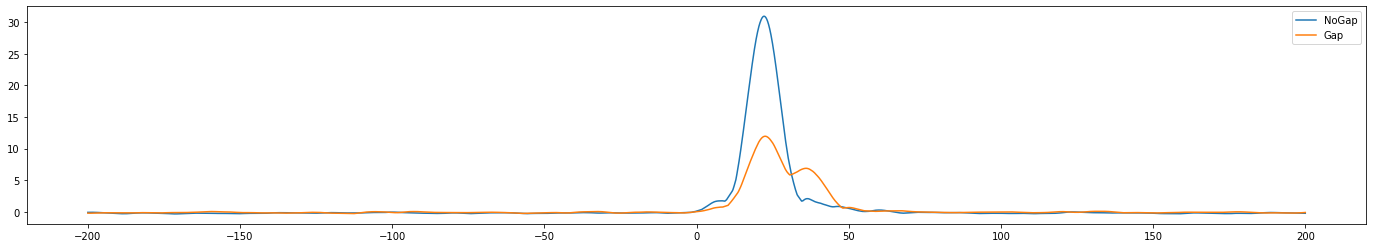

In [12]:
ax = pd.DataFrame([
    pd.Series(GPIASRec['Trace']['8000-10000']['NoGap'].ravel()),
    pd.Series(GPIASRec['Trace']['8000-10000']['Gap'].ravel()),
], index=['NoGap', 'Gap']).T.set_index(XValues).plot(figsize=(24, 4))

# ax.axhline(30.946272)
# ax.axvline(22.166667)
# # GPIASRec['Trace']['8000-10000']

In [13]:
GPIASPlot.Traces(GPIASRec, XValues, DataInfo['Audio']['SoundLoudPulseDur'],
                 FigName, False, 'Trace', Ext, {}, Save, Show)

Plotting...
Done.
